<a href="https://colab.research.google.com/github/GDurgaGowri/Stock-Prediction-Tesla/blob/main/Employee_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

DATA COLLECTION

In [69]:
url = 'employee_churn.csv'
data = pd.read_csv(url, encoding='latin1')

In [70]:
print(data.head())


   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0  


EDA

In [71]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64


In [72]:
# Identify categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [73]:
# Identify the target variable
target_variable = 'status'

# Split the data into features (X) and target variable (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]




In [74]:
# Check the datatypes of features
print(X.dtypes)


avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
tenure               float64
dtype: object


In [75]:
missing_values = data.isnull().sum()
print(missing_values)

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64


In [76]:
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [77]:
target_variable = 'status'

# Split the data into features (X) and target variable (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

In [78]:
print(X.dtypes)# Perform one-hot encoding for remaining categorical variables
X_encoded = pd.get_dummies(X, columns=['department', 'salary'], drop_first=True)

# Now, let's scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
tenure               float64
dtype: object


MODEL TRAINING

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Check for missing values in X_train
missing_values = pd.DataFrame(X_train).isnull().sum()
print(missing_values)


0         0
1      9757
2      1225
3         0
4     11163
5       145
6       145
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
dtype: int64


In [80]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the fitted imputer
X_test_imputed = imputer.transform(X_test)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

    Employed       0.98      0.99      0.99      2189
        Left       0.97      0.94      0.96       661

    accuracy                           0.98      2850
   macro avg       0.98      0.97      0.97      2850
weighted avg       0.98      0.98      0.98      2850



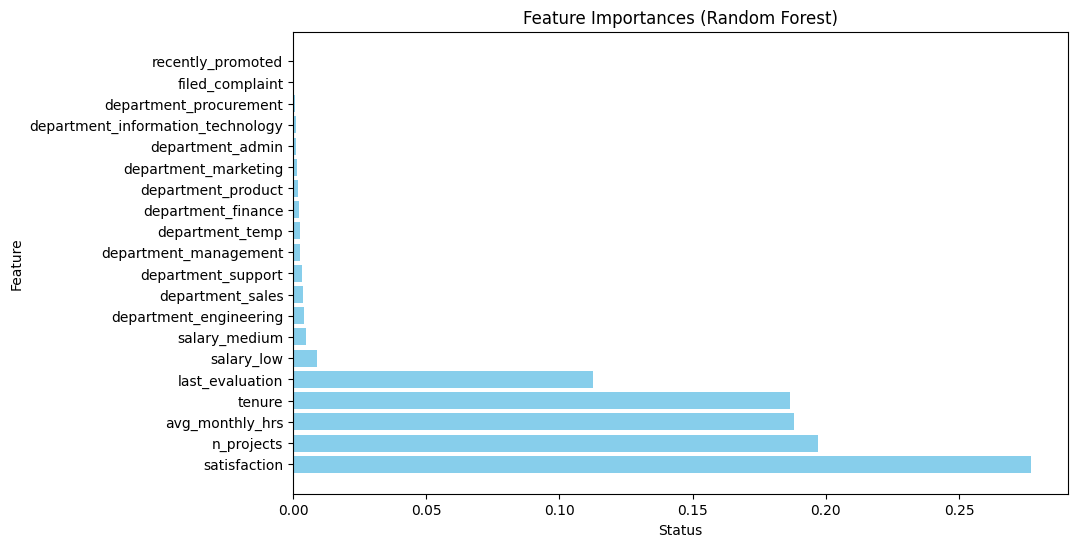

In [82]:
# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Status': feature_importances})

# Sort the DataFrame by 'Status' (importance)
feature_importance_df = feature_importance_df.sort_values(by='Status', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Status'], color='skyblue')
plt.xlabel('Status')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()


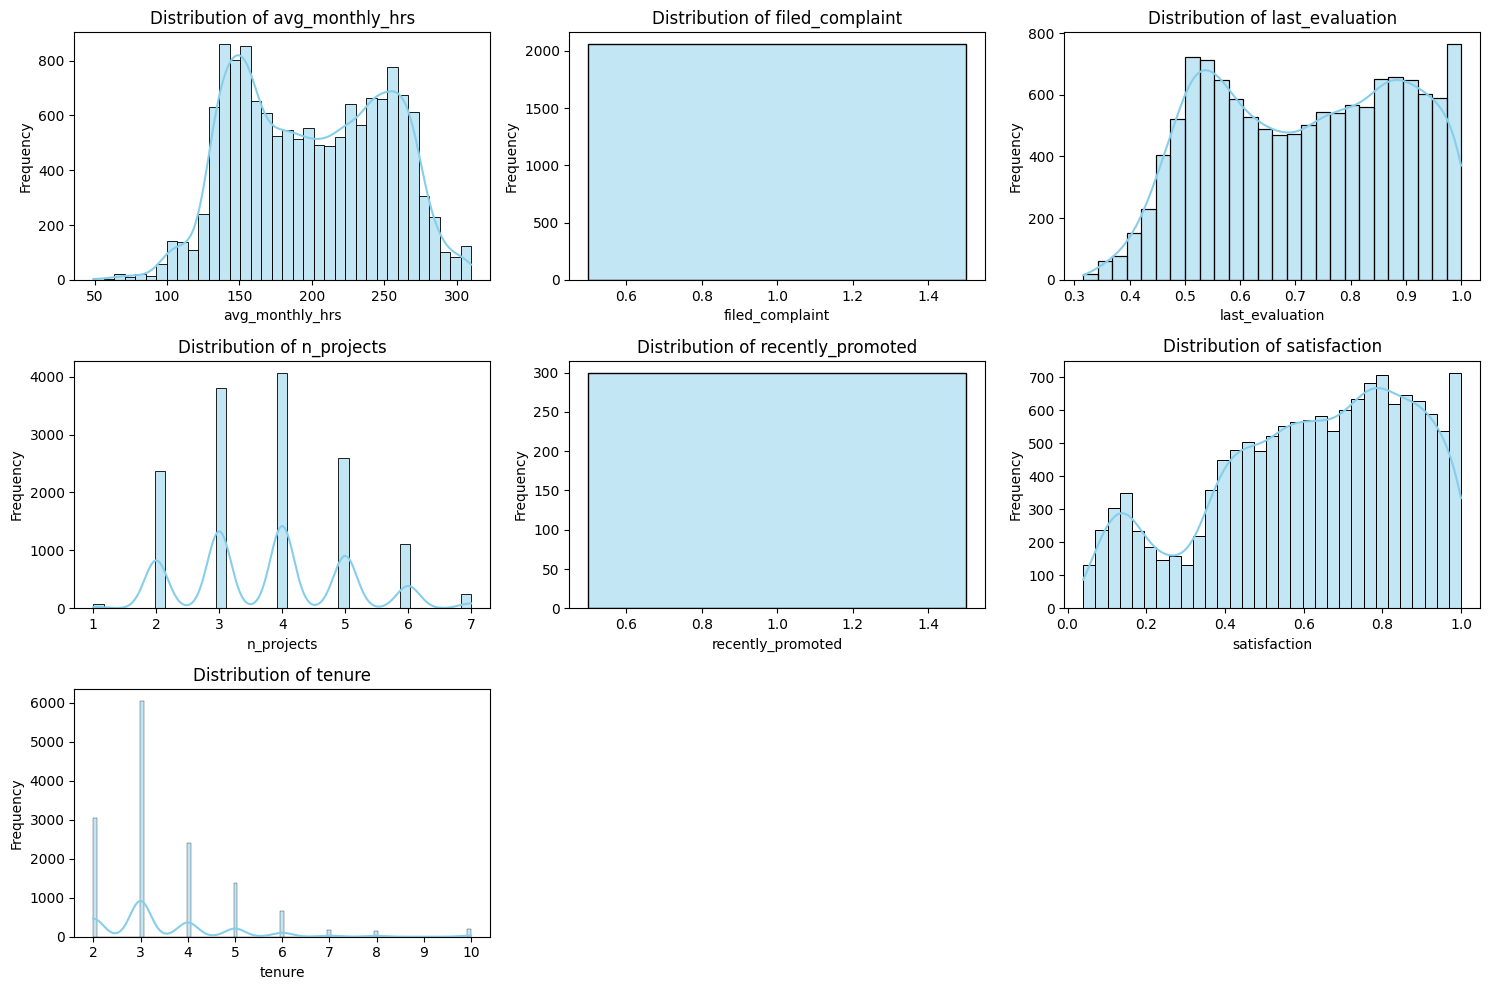

In [83]:
import seaborn as sns
# Plot distribution plots for numeric features
numeric_features = ['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'satisfaction', 'tenure']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


MODEL TESTING

In [84]:
import numpy as np

# Collect input from the user for each feature
avg_monthly_hrs = float(input("Enter average monthly hours: "))
department = input("Enter department (engineering, support, sales): ")
filed_complaint = float(input("Enter filed complaint (0 or 1): "))
last_evaluation = float(input("Enter last evaluation score (0 to 1): "))
n_projects = float(input("Enter number of projects: "))
recently_promoted = float(input("Enter recently promoted (0 or 1): "))
salary = input("Enter salary (low, medium, high): ")
satisfaction = float(input("Enter satisfaction score (0 to 1): "))
tenure = float(input("Enter tenure (in years): "))

# Preprocess the input data
department_encoded = np.zeros(3)
if department == 'engineering':
    department_encoded[0] = 1
elif department == 'support':
    department_encoded[1] = 1
elif department == 'sales':
    department_encoded[2] = 1

salary_encoded = np.zeros(2)
if salary == 'medium':
    salary_encoded[0] = 1
elif salary == 'high':
    salary_encoded[1] = 1

# Combine input features into a single array
input_features = np.array([avg_monthly_hrs, filed_complaint, last_evaluation, n_projects, recently_promoted, satisfaction, tenure])
input_features = np.concatenate((input_features, department_encoded, salary_encoded))

# Fill in missing features with zeros
missing_features = [0] * (20 - len(input_features))
input_features = np.concatenate((input_features, missing_features))

# Make prediction using the trained model
predicted_status = rf_classifier.predict([input_features])

# Display the predicted status to the user
print("Predicted status:", predicted_status)



Enter average monthly hours: 6
Enter department (engineering, support, sales): sales
Enter filed complaint (0 or 1): 1
Enter last evaluation score (0 to 1): 1
Enter number of projects: 1
Enter recently promoted (0 or 1): 1
Enter salary (low, medium, high): low
Enter satisfaction score (0 to 1): 1
Enter tenure (in years): 1
Predicted status: ['Left']


<ipython-input-97-ecf38e1c354f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


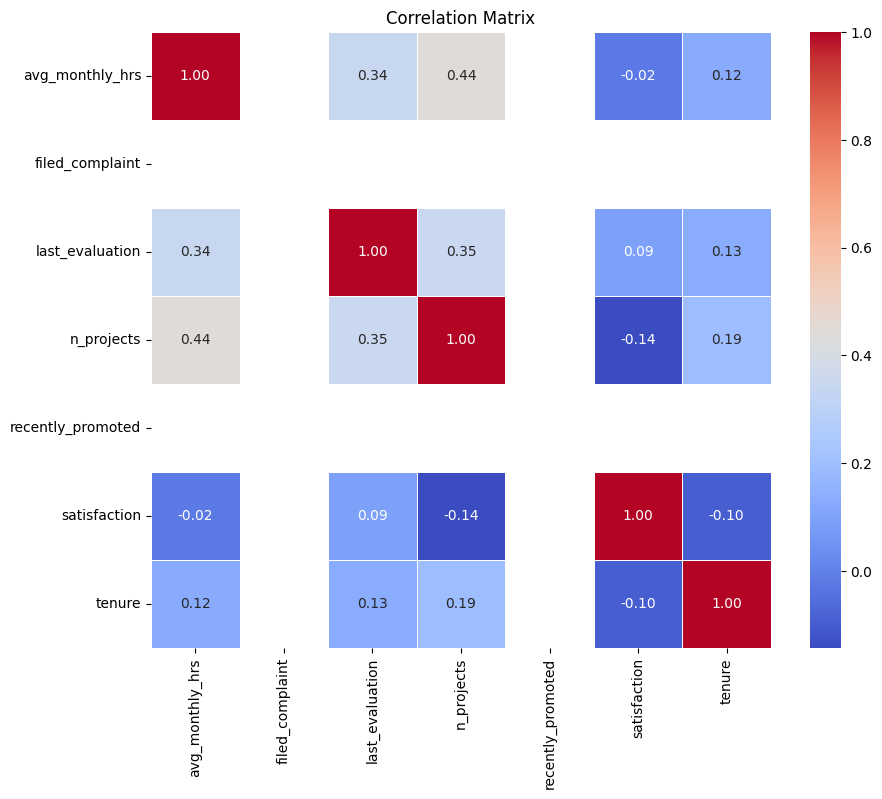

In [97]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-86-3d525f227fe7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department', y=feature, data=data, palette='husl')
<ipython-input-86-3d525f227fe7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department', y=feature, data=data, palette='husl')
<ipython-input-86-3d525f227fe7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department', y=feature, data=data, palette='husl')
<ipython-input-86-3d525f227fe7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

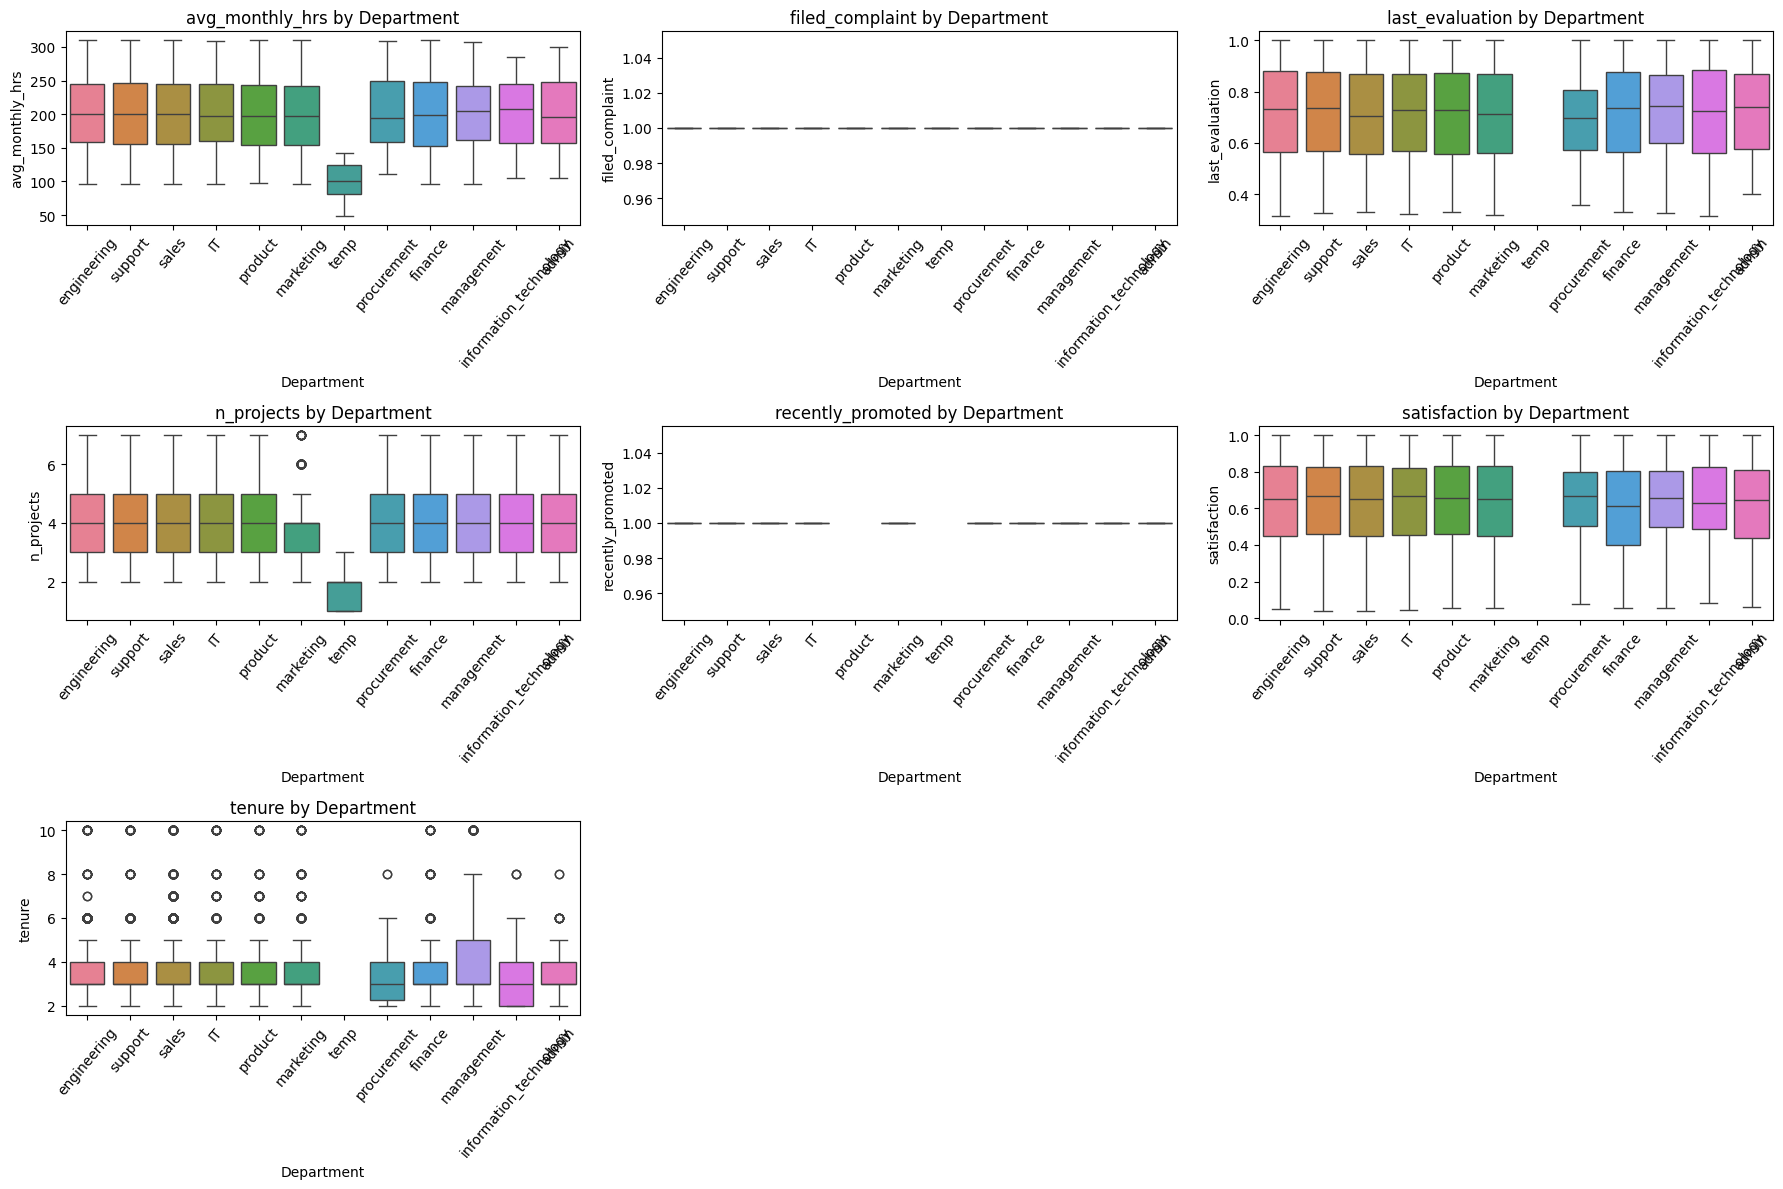

In [86]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='department', y=feature, data=data, palette='husl')
    plt.title(f'{feature} by Department')
    plt.xlabel('Department')
    plt.ylabel(feature)
    plt.xticks(rotation=50)

plt.tight_layout()
plt.show()


TRAINING USING OTHERS

In [87]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

# Train and evaluate SVM classifier
svm_classifier.fit(X_train_imputed, y_train)
svm_accuracy = svm_classifier.score(X_test_imputed, y_test)
print("SVM Accuracy:", svm_accuracy)

# Train and evaluate k-NN classifier
knn_classifier.fit(X_train_imputed, y_train)
knn_accuracy = knn_classifier.score(X_test_imputed, y_test)
print("k-NN Accuracy:", knn_accuracy)


SVM Accuracy: 0.9452631578947368
k-NN Accuracy: 0.9438596491228071


Random Forest Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.98      0.99      0.99      2189
        Left       0.97      0.94      0.96       661

    accuracy                           0.98      2850
   macro avg       0.98      0.97      0.97      2850
weighted avg       0.98      0.98      0.98      2850

Accuracy: 0.98
ROC AUC Score: 0.9936558739233232


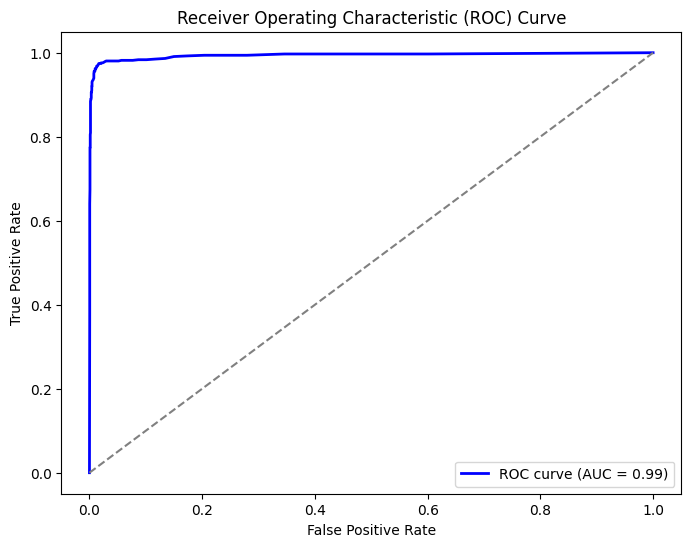

SVM Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.97      0.96      0.96      2189
        Left       0.88      0.89      0.88       661

    accuracy                           0.95      2850
   macro avg       0.92      0.93      0.92      2850
weighted avg       0.95      0.95      0.95      2850

Accuracy: 0.9452631578947368
k-NN Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.98      0.95      0.96      2189
        Left       0.85      0.92      0.88       661

    accuracy                           0.94      2850
   macro avg       0.91      0.94      0.92      2850
weighted avg       0.95      0.94      0.94      2850

Accuracy: 0.9438596491228071
ROC AUC Score: 0.9756352937842838


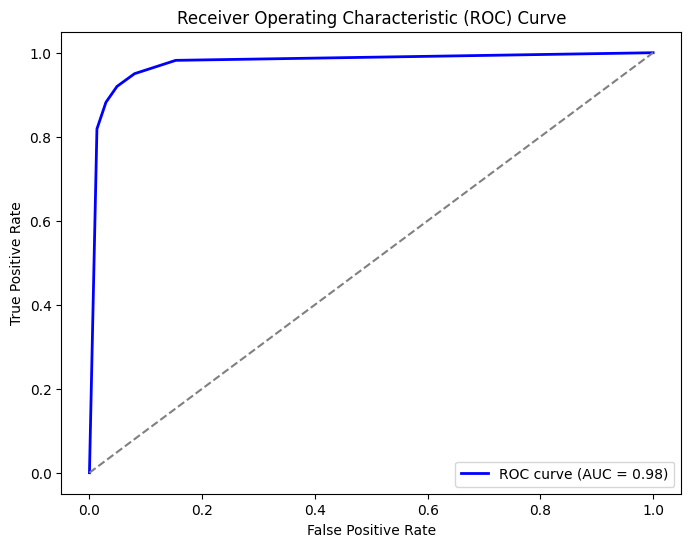

In [88]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Encode class labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    # Predict probabilities for models supporting it
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None

    # Predict classes
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # ROC AUC score if available
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
        print("ROC AUC Score:", roc_auc)

        # ROC curve
        fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

# Evaluate Random Forest classifier
print("Random Forest Classifier Evaluation:")
evaluate_model(rf_classifier, X_test_imputed, y_test)

# Evaluate SVM classifier
print("SVM Classifier Evaluation:")
evaluate_model(svm_classifier, X_test_imputed, y_test)

# Evaluate k-NN classifier
print("k-NN Classifier Evaluation:")
evaluate_model(knn_classifier, X_test_imputed, y_test)


Random Forest Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.98      0.99      0.99      2189
        Left       0.97      0.94      0.96       661

    accuracy                           0.98      2850
   macro avg       0.98      0.97      0.97      2850
weighted avg       0.98      0.98      0.98      2850

Accuracy: 0.98
ROC AUC Score: 0.9936558739233232


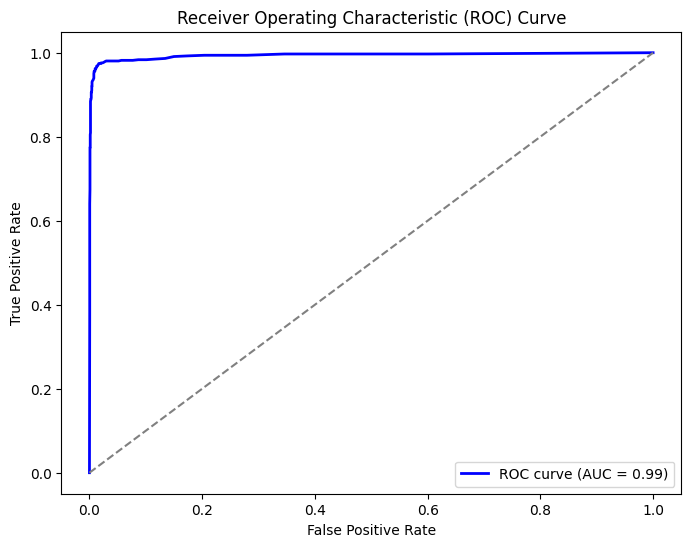

SVM Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.97      0.96      0.96      2189
        Left       0.88      0.89      0.88       661

    accuracy                           0.95      2850
   macro avg       0.92      0.93      0.92      2850
weighted avg       0.95      0.95      0.95      2850

Accuracy: 0.9452631578947368
k-NN Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.98      0.95      0.96      2189
        Left       0.85      0.92      0.88       661

    accuracy                           0.94      2850
   macro avg       0.91      0.94      0.92      2850
weighted avg       0.95      0.94      0.94      2850

Accuracy: 0.9438596491228071
ROC AUC Score: 0.9756352937842838


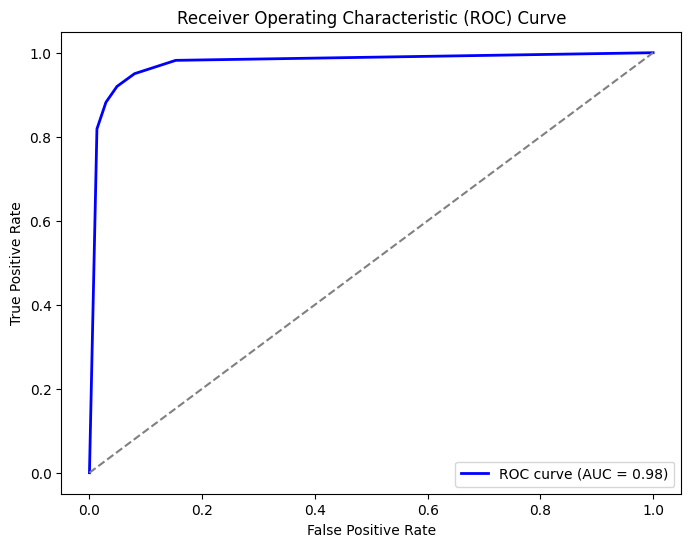

In [89]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Encode class labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    # Predict probabilities for models supporting it
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None

    # Predict classes
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # ROC AUC score if available
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
        print("ROC AUC Score:", roc_auc)

        # ROC curve
        fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

# Evaluate Random Forest classifier
print("Random Forest Classifier Evaluation:")
evaluate_model(rf_classifier, X_test_imputed, y_test)

# Evaluate SVM classifier
print("SVM Classifier Evaluation:")
evaluate_model(svm_classifier, X_test_imputed, y_test)

# Evaluate k-NN classifier
print("k-NN Classifier Evaluation:")
evaluate_model(knn_classifier, X_test_imputed, y_test)


AdaBoost Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.95      0.95      0.95      2189
        Left       0.85      0.84      0.85       661

    accuracy                           0.93      2850
   macro avg       0.90      0.90      0.90      2850
weighted avg       0.93      0.93      0.93      2850

Accuracy: 0.9287719298245614
ROC AUC Score: 0.9657481465918507


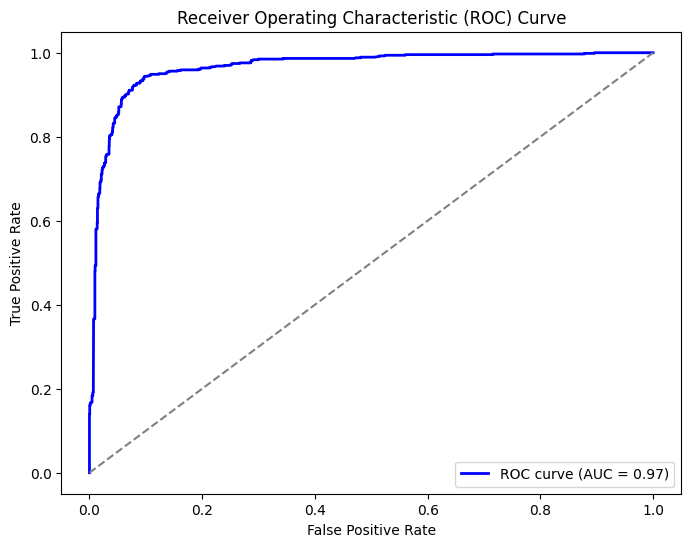

Gradient Boosting Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

    Employed       0.98      0.99      0.99      2189
        Left       0.96      0.94      0.95       661

    accuracy                           0.98      2850
   macro avg       0.97      0.97      0.97      2850
weighted avg       0.98      0.98      0.98      2850

Accuracy: 0.9778947368421053
ROC AUC Score: 0.9873203868330789


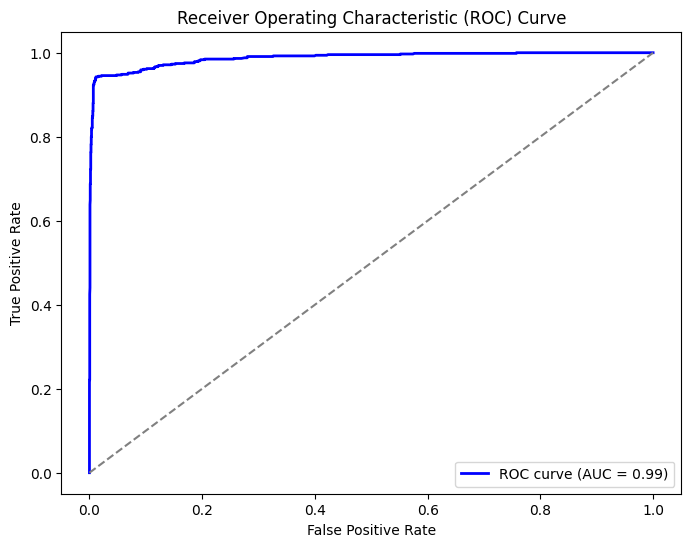

In [90]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit AdaBoost classifier
adaboost_classifier.fit(X_train_imputed, y_train)

# Evaluate AdaBoost classifier
print("AdaBoost Classifier Evaluation:")
evaluate_model(adaboost_classifier, X_test_imputed, y_test)

# Initialize Gradient Boosting classifier
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

# Fit Gradient Boosting classifier
gradientboost_classifier.fit(X_train_imputed, y_train)

# Evaluate Gradient Boosting classifier
print("Gradient Boosting Classifier Evaluation:")
evaluate_model(gradientboost_classifier, X_test_imputed, y_test)


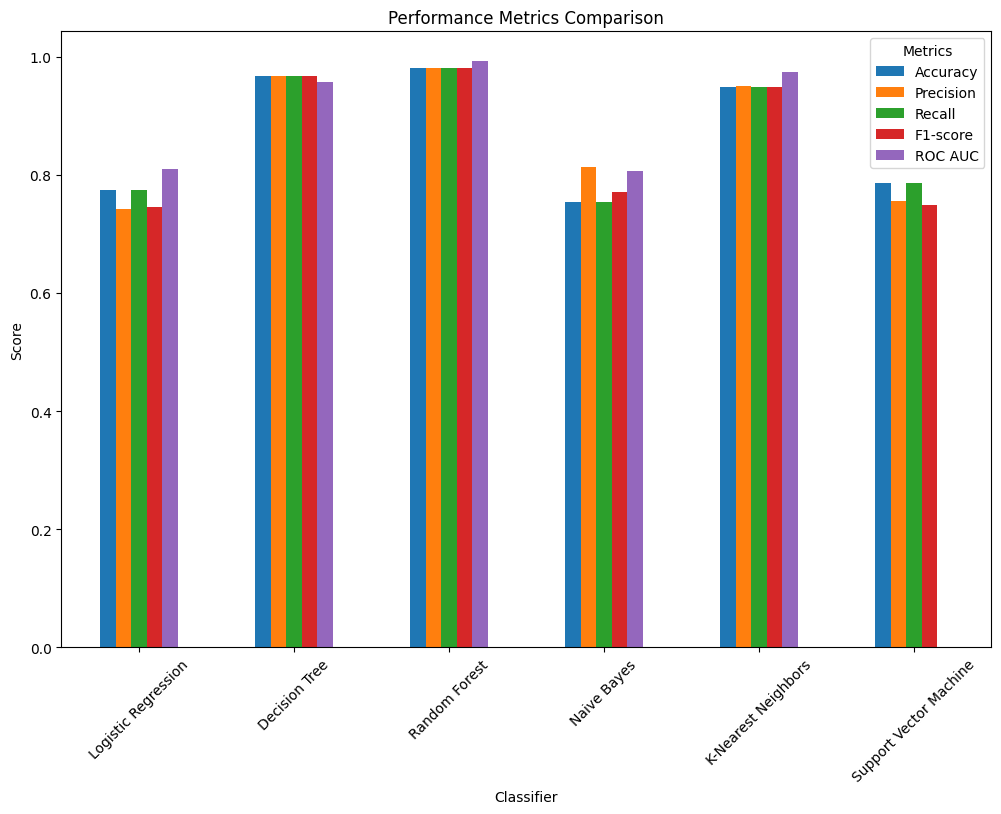

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

# Initialize classifiers
lr = LogisticRegression(C=0.1, random_state=42, solver='liblinear')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm_clf = svm.SVC(kernel='linear')

# Train and evaluate each classifier
classifiers = {'Logistic Regression': lr,
               'Decision Tree': dt,
               'Random Forest': rf,
               'Naive Bayes': gnb,
               'K-Nearest Neighbors': knn,
               'Support Vector Machine': svm_clf}

performance_metrics = {}

for name, clf in classifiers.items():
    clf.fit(X_train_imputed, y_train)
    y_pred = clf.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']

    # Calculate ROC AUC score if classifier supports probability estimates
    if hasattr(clf, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_imputed)[:, 1])
    else:
        roc_auc = None

    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score,
        'ROC AUC': roc_auc
    }

# Convert performance metrics to DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics).transpose()

# Plotting
performance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Performance Metrics Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()


In [92]:
feature_dict = dict(zip(data.columns, list(lr.coef_[0])))
feature_dict


{'avg_monthly_hrs': 0.19565006073710467,
 'department': 0.0,
 'filed_complaint': 0.21934293989600506,
 'last_evaluation': -0.38813828917239895,
 'n_projects': 0.0,
 'recently_promoted': -1.018614626176503,
 'salary': 0.3556592044014454,
 'satisfaction': -0.03871622523791475,
 'status': 0.02938255671797124,
 'tenure': 0.0036279006757651932}

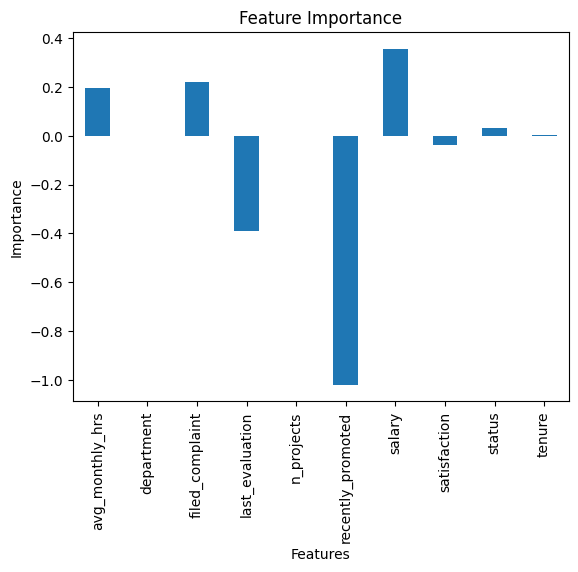

In [93]:
# Create a DataFrame from the feature importance dictionary
feature_df = pd.DataFrame.from_dict(feature_dict, orient='index', columns=['Importance'])

# Plot the feature importances as a bar chart
feature_df.plot(kind='bar', legend=False, title='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [94]:
import pickle

# Save the trained model to disk
filename = 'finalized_model.pickle'
with open(filename, 'wb') as file:
    pickle.dump(lr, file)


In [95]:
import numpy as np

# Collect input from the user for each feature
avg_monthly_hrs = float(input("Enter average monthly hours: "))
department = input("Enter department (engineering, support, sales): ")
filed_complaint = float(input("Enter filed complaint (0 or 1): "))
last_evaluation = float(input("Enter last evaluation score (0 to 1): "))
n_projects = float(input("Enter number of projects: "))
recently_promoted = float(input("Enter recently promoted (0 or 1): "))
salary = input("Enter salary (low, medium, high): ")
satisfaction = float(input("Enter satisfaction score (0 to 1): "))
tenure = float(input("Enter tenure (in years): "))

# Preprocess the input data
department_encoded = np.zeros(3)
if department == 'engineering':
    department_encoded[0] = 1
elif department == 'support':
    department_encoded[1] = 1
elif department == 'sales':
    department_encoded[2] = 1

salary_encoded = np.zeros(2)
if salary == 'medium':
    salary_encoded[0] = 1
elif salary == 'high':
    salary_encoded[1] = 1

# Combine input features into a single array
input_features = np.array([avg_monthly_hrs, filed_complaint, last_evaluation, n_projects, recently_promoted, satisfaction, tenure])
input_features = np.concatenate((input_features, department_encoded, salary_encoded))

# Fill in missing features with zeros
missing_features = [0] * (20 - len(input_features))
input_features = np.concatenate((input_features, missing_features))

# Make prediction using the trained model
predicted_status = rf_classifier.predict([input_features])

# Display the predicted status to the user
print("Predicted status:", predicted_status)



Enter average monthly hours: 6
Enter department (engineering, support, sales): sales
Enter filed complaint (0 or 1): 1
Enter last evaluation score (0 to 1): 1
Enter number of projects: 1
Enter recently promoted (0 or 1): 1
Enter salary (low, medium, high): low
Enter satisfaction score (0 to 1): 1
Enter tenure (in years): 1
Predicted status: ['Left']


In [96]:
from sklearn.metrics import accuracy_score

# Assuming `true_status` is the true label corresponding to the user input
true_status = predicted_status  # Obtain or generate true labels
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming `true_status` is obtained from your dataset or generated based on historical data
true_status = ...  # Obtain or generate true labels

# Convert predicted status to binary labels if needed
predicted_status_binary = 1 if predicted_status == 'Active' else 0

# Encode true_status using LabelEncoder
label_encoder = LabelEncoder()
true_status_encoded = label_encoder.fit_transform([true_status])

# Calculate accuracy
accuracy = accuracy_score(true_status_encoded, [predicted_status_binary])
print("Accuracy:", accuracy)



Accuracy: 1.0
